In [1]:
!pip install scikit-learn matplotlib seaborn


In [2]:
from google.colab import files
uploaded = files.upload()


Saving dengelenmis_dosya (1).csv to dengelenmis_dosya (1).csv



🔹 Eğitim Oranı: %70

🔸 Genel Metrikler:
Accuracy:  0.6897
Precision: 0.6843
Recall:    0.6897
F1 Score:  0.6859

🔸 Sınıf Bazlı Rapor:

              precision    recall  f1-score   support

    negative     0.7186    0.7650    0.7411       217
     neutral     0.5885    0.5207    0.5526       217
    positive     0.7456    0.7834    0.7640       217

    accuracy                         0.6897       651
   macro avg     0.6843    0.6897    0.6859       651
weighted avg     0.6843    0.6897    0.6859       651



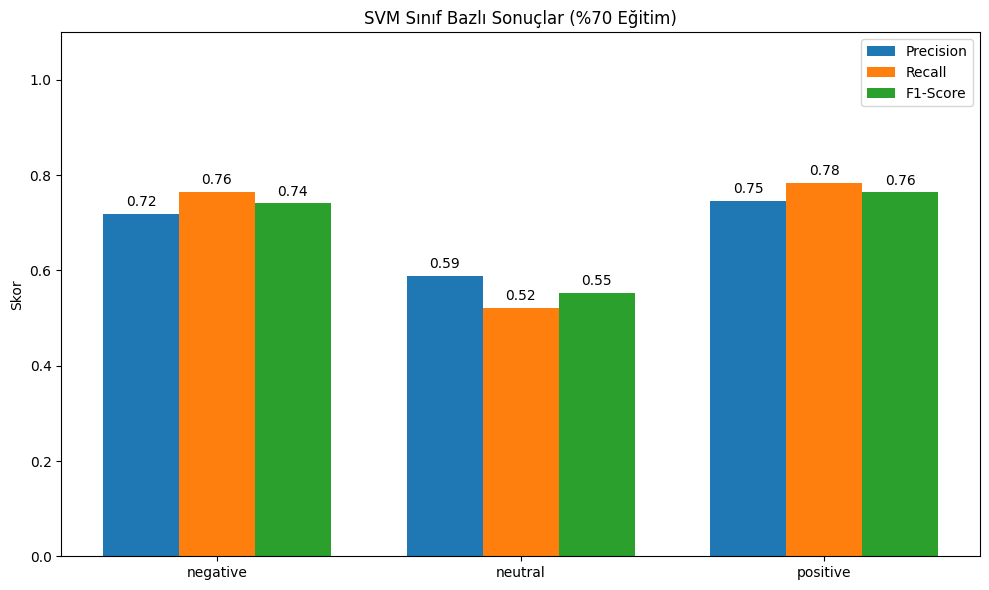

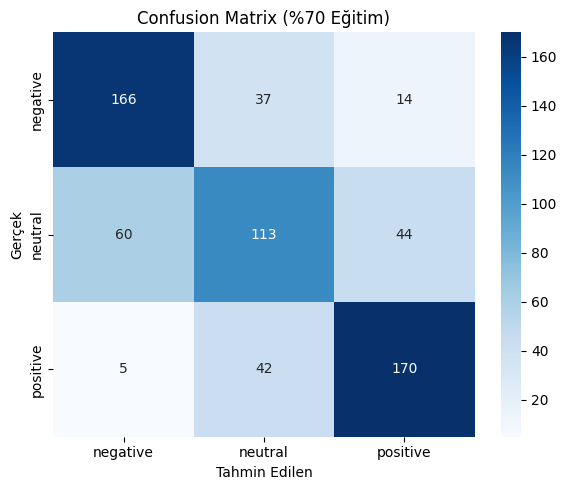


🔹 Eğitim Oranı: %80

🔸 Genel Metrikler:
Accuracy:  0.7074
Precision: 0.7017
Recall:    0.7076
F1 Score:  0.7028

🔸 Sınıf Bazlı Rapor:

              precision    recall  f1-score   support

    negative     0.7178    0.8125    0.7622       144
     neutral     0.5873    0.5103    0.5461       145
    positive     0.8000    0.8000    0.8000       145

    accuracy                         0.7074       434
   macro avg     0.7017    0.7076    0.7028       434
weighted avg     0.7017    0.7074    0.7026       434



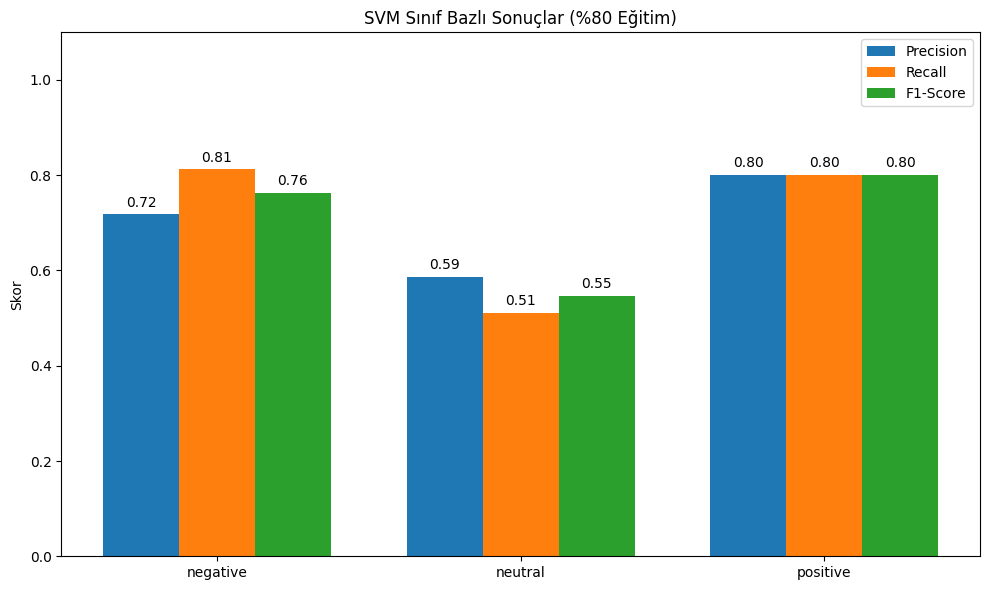

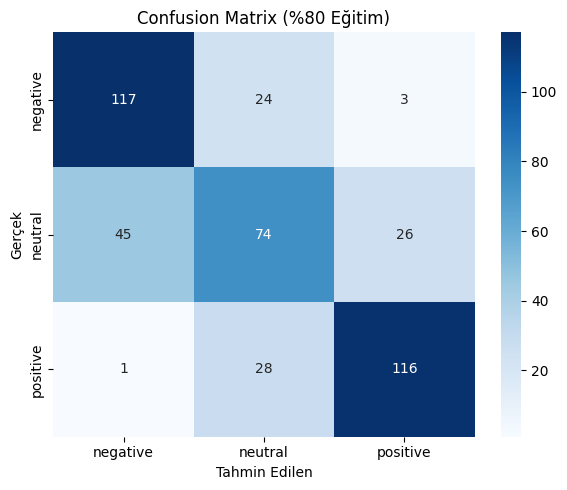

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    classification_report, confusion_matrix
)

# Dosya adını al
csv_filename = next(iter(uploaded))

# Veriyi oku
df = pd.read_csv(csv_filename)

# review sütununu düz metne çevir (liste → cümle)
df['review'] = df['review'].apply(ast.literal_eval).apply(lambda x: ' '.join(x))

# Özellikler ve etiketler
X = df['review'].astype(str)
y = df['label'].astype(int)
class_labels = ['negative', 'neutral', 'positive']

# Eğitim oranları
train_ratios = [0.7, 0.8]

# TF-IDF
vectorizer = TfidfVectorizer()

for ratio in train_ratios:
    print(f"\n{'='*40}\n🔹 Eğitim Oranı: %{int(ratio*100)}\n{'='*40}")

    # Eğitim/test böl
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=1 - ratio, stratify=y, random_state=42
    )

    # Vektörleştir
    X_train_vec = vectorizer.fit_transform(X_train)
    X_test_vec = vectorizer.transform(X_test)

    # SVM Modeli
    svm_model = SVC(kernel='linear', random_state=42)
    svm_model.fit(X_train_vec, y_train)

    # Tahmin
    y_pred = svm_model.predict(X_test_vec)

    # Genel metrikler
    print("\n🔸 Genel Metrikler:")
    print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro'):.4f}")
    print(f"Recall:    {recall_score(y_test, y_pred, average='macro'):.4f}")
    print(f"F1 Score:  {f1_score(y_test, y_pred, average='macro'):.4f}")

    # Sınıf bazlı rapor
    print("\n🔸 Sınıf Bazlı Rapor:\n")
    print(classification_report(y_test, y_pred, target_names=class_labels, digits=4))

    # Bar grafik: sınıf bazlı
    precision_c = precision_score(y_test, y_pred, average=None)
    recall_c = recall_score(y_test, y_pred, average=None)
    f1_c = f1_score(y_test, y_pred, average=None)

    x = np.arange(len(class_labels))
    width = 0.25

    plt.figure(figsize=(10, 6))
    b1 = plt.bar(x - width, precision_c, width, label='Precision')
    b2 = plt.bar(x, recall_c, width, label='Recall')
    b3 = plt.bar(x + width, f1_c, width, label='F1-Score')

    for bars in [b1, b2, b3]:
        for bar in bars:
            yval = bar.get_height()
            plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.01, f"{yval:.2f}", ha='center', va='bottom')

    plt.xticks(ticks=x, labels=class_labels)
    plt.ylim(0, 1.1)
    plt.title(f"SVM Sınıf Bazlı Sonuçlar (%{int(ratio*100)} Eğitim)")
    plt.ylabel("Skor")
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel("Tahmin Edilen")
    plt.ylabel("Gerçek")
    plt.title(f"Confusion Matrix (%{int(ratio*100)} Eğitim)")
    plt.tight_layout()
    plt.show()
